In [6]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
from math import floor

In [ ]:
def analyze(path, file, head_list):
    list_dict = [{} for _ in range(len(head_list))]
    with open(path.join(path, file), 'r') as inp:
        lines = csv.reader(inp, delimiter='\n')
        for line in lines:
            clmn = list()
            for header in head_list:
                clmn.append(list(line)[0].split(',').index(header))
            break
    with open(path.join(path, file), 'r') as inp:
        lines = csv.reader(inp, delimiter=',')
        for line in lines:
            for i in clmn:
                el = line[i].strip()
                j = clmn.index(i)
                if el not in list_dict[j]:
                    list_dict[j][el] = 1
                else:
                    list_dict[j][el] += 1
    return list_dict

In [ ]:
def stat_by_head(path, head_list, x):
    for head in head_list:
        stat_file = head + '.csv'
        with open(os.path.join(path, stat_file), 'w', newline='\n') as out:
            data = csv.writer(out, delimiter=',')
            if type(x) == list: 
                for i in list(x[head_list.index(head)].items()):
                    if i[0] == head:
                        data.writerow([i[0], 'molecules'])
                        continue
                    data.writerow(i)
            if type(x) == dict: 
                for i in list(x.items()):
                    if i[0] == head:
                        data.writerow([i[0], 'molecules'])
                        continue
                    data.writerow(i)


In [ ]:
def mol_mass_stat(path, file, int_range, flag, limit):
    dict_mol_mass = {}
    header = 'mol_mass'
    with open(os.path.join(path, file), 'r') as inp:
        lines = csv.reader(inp, delimiter='\n')
        for line in lines:
            clmn = list(line)[0].split(',').index(header)
            break
    with open(os.path.join(path, file), 'r') as inp:
        lines = csv.reader(inp, delimiter=',')
        if flag == 0:
            for line in lines:
                if line[clmn] == header:
                    dict_mol_mass[header] = 'molecules'
                else:
                    l = floor(float(line[clmn])/int_range) * int_range
                    if l not in dict_mol_mass.keys():
                        dict_mol_mass[l] = 1
                    else:
                        dict_mol_mass[l] += 1
        elif flag == 1:
            for line in lines:
                if line[clmn] == header:
                    dict_mol_mass[header] = 'molecules'
                else:
                    # limit for heavy_atoms
                    if int(line[8]) <= limit:
                        l = floor(float(line[clmn])/int_range) * int_range
                        if l not in dict_mol_mass.keys():
                            dict_mol_mass[l] = 1
                        else:
                            dict_mol_mass[l] += 1
    return dict_mol_mass

In [2]:
def plot(df):
    fig, axes = plt.subplots(figsize=(20, 9))
    sns.set_theme(style="whitegrid")
    res = sns.barplot(x=stat_file[:-4], y='molecules', data=df, ax=axes)
    res.set_xlabel(stat_file[:-4], fontsize=20)
    res.set_ylabel("molecules (%)", fontsize=20)
    for tick in axes.xaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    for tick in axes.yaxis.get_major_ticks():
        tick.label.set_fontsize(16)
    plt.show()

    # plt.savefig(os.path.join(path, path_graphs, l[0] +'.png'))

    return res

In [7]:
path = "/home/gilmullin/Documents/SberDatasets/sber_chem_datasets/tests/"
# path = '/home/almaz/Documents/project/sber_chem_datasets/tests/'

file = 'filtered_pubchem.csv'
# file = 'test.csv'

head_list = ['rot_bonds', 'h_acc', 'h_don', 'heavy_atoms', 'ring_count', 'bonds_count']
# head_list = ['mol_mass']

path_to_stat = "stat/"

stat_file = 'ring_count.csv'
# stat_file = 'mol_mass.csv'

path_graphs = "graphs/"

l = [stat_file[:-4]]

In [ ]:
# data  = mol_mass_stat(path, file, 50, 1, 100)
data = analyze(path, file, head_list) 

stat_by_head(path + path_to_stat, head_list, data)

In [8]:
data = pd.read_csv(os.path.join(path, path_to_stat, stat_file))
df = pd.DataFrame(data)

FileNotFoundError: [Errno 2] No such file or directory: '/home/gilmullin/Documents/SberDatasets/sber_chem_datasets/tests/stat/ring_count.csv'

In [ ]:
df

In [ ]:
# for mol_mass
df = df.sort_values(by=l, ignore_index=True)
s = sum(df['molecules'])
df

In [ ]:
chart = plot(df)

In [ ]:
df = df[df[l[0]] < 8]
# df = df[df[l[0]] > 8]
df


In [ ]:
df_proc = df.copy()
df_proc['molecules'] = df_proc['molecules'] / s * 100
df_proc

In [ ]:
chart = plot(df)

In [ ]:
chart = plot(df_proc)

In [ ]:
chart = plot(df_proc)

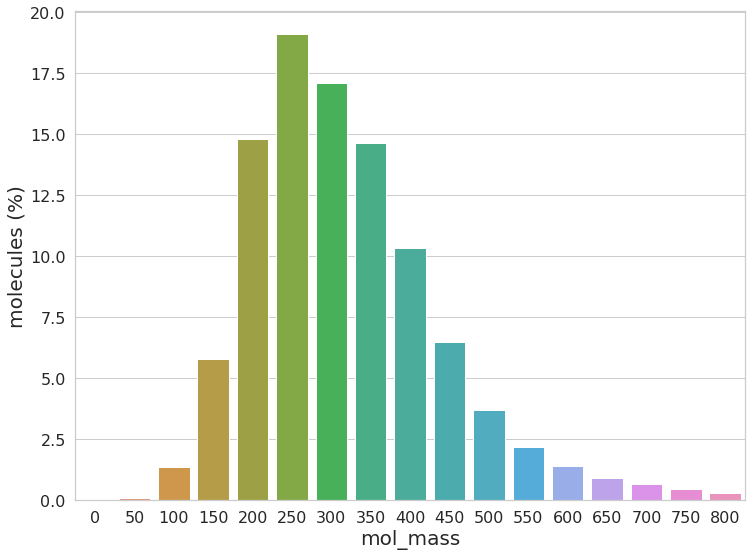

In [86]:
chart = plot(df_proc)